<h4>Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_30s = pd.read_csv('features_30_sec.csv')
df_30s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
df_3s = pd.read_csv('features_3_sec_fix.csv')
df_3s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


<h4>ANN

In [4]:
from sklearn.preprocessing import LabelEncoder

class_list_30s = df_30s.iloc[:,-1]
le_30s = LabelEncoder()

In [5]:
y_30s = le_30s.fit_transform(class_list_30s)
len(y_30s)

1000

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_30s = scaler.fit_transform(np.array(df_30s.iloc[:,2:-1], dtype = float))

In [7]:
X_30s.shape

(1000, 57)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_30s, y_30s, test_size=0.2)

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
model = keras.models.Sequential()

model.add(Dense(units= 600,activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=400, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

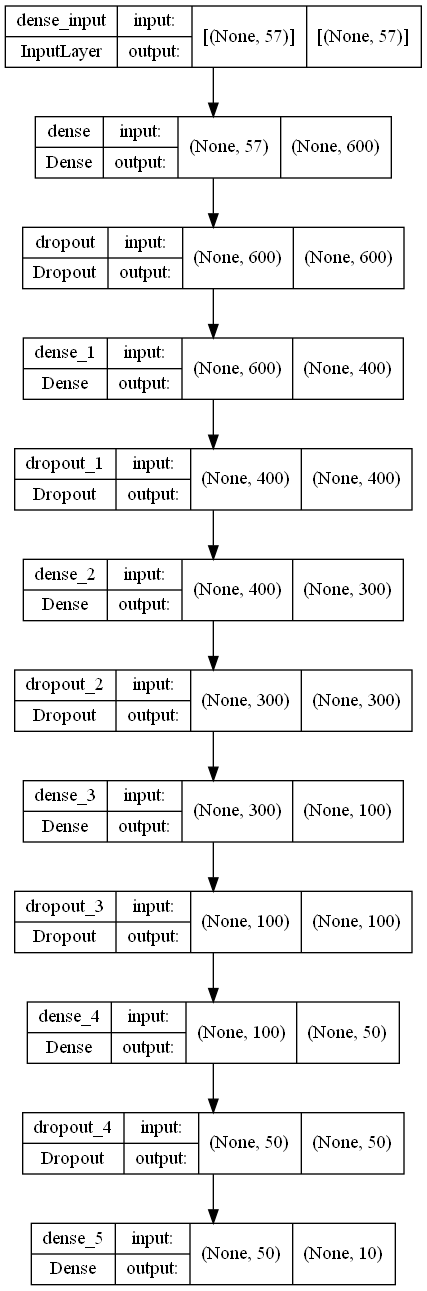

In [11]:
keras.utils.plot_model(model, "ANN.png", show_shapes=True)

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=150, 
                    callbacks = [checkpointer], validation_data=(X_test, y_test))

Epoch 1/50
1/6 [====>.........................] - ETA: 3s - loss: 2.3149 - accuracy: 0.1067
Epoch 1: val_accuracy improved from -inf to 0.41000, saving model to weights.hdf5
6/6 [==============================] - 1s 34ms/step - loss: 2.2099 - accuracy: 0.1900 - val_loss: 2.0207 - val_accuracy: 0.4100
Epoch 2/50
1/6 [====>.........................] - ETA: 0s - loss: 2.0990 - accuracy: 0.2533
Epoch 2: val_accuracy improved from 0.41000 to 0.45000, saving model to weights.hdf5
6/6 [==============================] - 0s 14ms/step - loss: 1.9133 - accuracy: 0.3250 - val_loss: 1.6480 - val_accuracy: 0.4500
Epoch 3/50
1/6 [====>.........................] - ETA: 0s - loss: 1.7093 - accuracy: 0.3467
Epoch 3: val_accuracy improved from 0.45000 to 0.49000, saving model to weights.hdf5
6/6 [==============================] - 0s 14ms/step - loss: 1.7087 - accuracy: 0.3688 - val_loss: 1.4164 - val_accuracy: 0.4900
Epoch 4/50
1/6 [====>.........................] - ETA: 0s - loss: 1.4799 - accuracy: 0.4

1/6 [====>.........................] - ETA: 0s - loss: 0.1722 - accuracy: 0.9533
Epoch 29: val_accuracy did not improve from 0.73500
6/6 [==============================] - 0s 7ms/step - loss: 0.2125 - accuracy: 0.9350 - val_loss: 1.2382 - val_accuracy: 0.6750
Epoch 30/50
1/6 [====>.........................] - ETA: 0s - loss: 0.1613 - accuracy: 0.9467
Epoch 30: val_accuracy did not improve from 0.73500
6/6 [==============================] - 0s 8ms/step - loss: 0.2054 - accuracy: 0.9362 - val_loss: 1.2218 - val_accuracy: 0.7000
Epoch 31/50
1/6 [====>.........................] - ETA: 0s - loss: 0.1714 - accuracy: 0.9467
Epoch 31: val_accuracy did not improve from 0.73500
6/6 [==============================] - 0s 7ms/step - loss: 0.1585 - accuracy: 0.9488 - val_loss: 1.2357 - val_accuracy: 0.6950
Epoch 32/50
1/6 [====>.........................] - ETA: 0s - loss: 0.1091 - accuracy: 0.9800
Epoch 32: val_accuracy did not improve from 0.73500
6/6 [==============================] - 0s 7ms/step 

In [13]:
model.save("ANN_30s.h5")

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=100)
print('test_loss: ', test_loss)
print('test acc: ', test_acc*100)

2/2 [==============================] - 0s 3ms/step - loss: 1.6509 - accuracy: 0.6900
test_loss:  1.650852918624878
test acc:  68.99999976158142


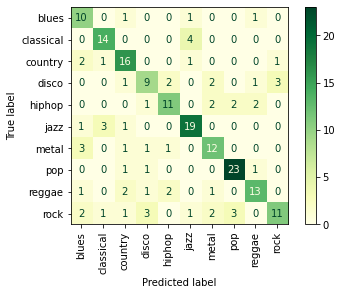

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = le_30s.inverse_transform(y_pred)

y_test_label = le_30s.inverse_transform(y_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test_label, y_pred, display_labels=le_30s.classes_,
                                               xticks_rotation="vertical", cmap="YlGn")

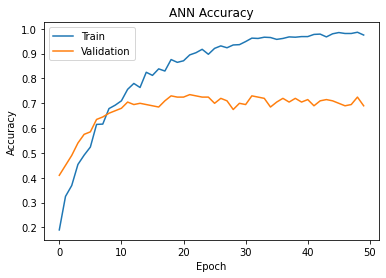

In [16]:
import matplotlib.pyplot as plt

plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

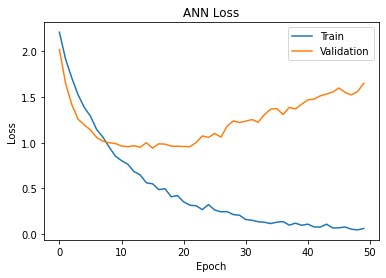

In [17]:
plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

<h4>RNN

In [18]:
class_list_3s = df_3s.iloc[:,-1]
le_3s = LabelEncoder()

In [19]:
y = le_3s.fit_transform(class_list_3s)
y

array([0, 0, 0, ..., 9, 9, 9])

In [20]:
scaler = StandardScaler()
X_3s = scaler.fit_transform(np.array(df_3s.iloc[:,2:-1], dtype = float))

In [21]:
X_3s.shape

(10000, 57)

In [22]:
from sklearn.model_selection import train_test_split

X_timeseries = np.reshape(X_3s, (1000, 10, 57))
y_timeseries = np.array([y[i] for i in range(0, 10000, 10)])

X_train, X_test, y_train, y_test = train_test_split(X_timeseries, y_timeseries, test_size=0.2)

In [23]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
model_lstm = Sequential()

model_lstm.add(LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(20))
model_lstm.add(Dense(units=10, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

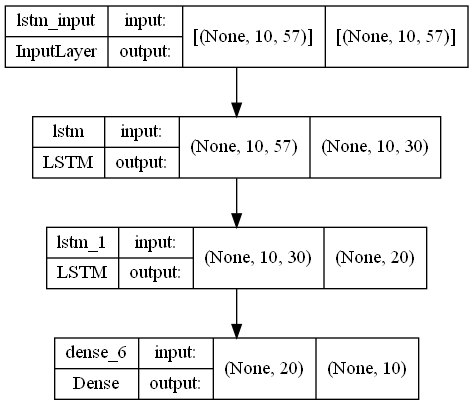

In [25]:
keras.utils.plot_model(model_lstm, "LSTM.png", show_shapes=True)

In [26]:
checkpointer = ModelCheckpoint(filepath="weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)

history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=150, 
                    callbacks = [checkpointer], validation_data=(X_test, y_test))

Epoch 1/50
1/6 [====>.........................] - ETA: 8s - loss: 2.3449 - accuracy: 0.0933
Epoch 1: val_accuracy improved from -inf to 0.16500, saving model to weights.hdf5
6/6 [==============================] - 2s 94ms/step - loss: 2.3306 - accuracy: 0.0938 - val_loss: 2.2726 - val_accuracy: 0.1650
Epoch 2/50
1/6 [====>.........................] - ETA: 0s - loss: 2.2658 - accuracy: 0.1600
Epoch 2: val_accuracy improved from 0.16500 to 0.28500, saving model to weights.hdf5
6/6 [==============================] - 0s 13ms/step - loss: 2.2281 - accuracy: 0.2262 - val_loss: 2.1939 - val_accuracy: 0.2850
Epoch 3/50
1/6 [====>.........................] - ETA: 0s - loss: 2.1844 - accuracy: 0.2733
Epoch 3: val_accuracy improved from 0.28500 to 0.35000, saving model to weights.hdf5
6/6 [==============================] - 0s 14ms/step - loss: 2.1418 - accuracy: 0.3388 - val_loss: 2.1249 - val_accuracy: 0.3500
Epoch 4/50
1/6 [====>.........................] - ETA: 0s - loss: 2.1046 - accuracy: 0.3

Epoch 29/50
1/6 [====>.........................] - ETA: 0s - loss: 0.6436 - accuracy: 0.8467
Epoch 29: val_accuracy improved from 0.62500 to 0.64000, saving model to weights.hdf5
6/6 [==============================] - 0s 13ms/step - loss: 0.6011 - accuracy: 0.8562 - val_loss: 1.0967 - val_accuracy: 0.6400
Epoch 30/50
1/6 [====>.........................] - ETA: 0s - loss: 0.5233 - accuracy: 0.9000
Epoch 30: val_accuracy improved from 0.64000 to 0.65000, saving model to weights.hdf5
6/6 [==============================] - 0s 13ms/step - loss: 0.5664 - accuracy: 0.8662 - val_loss: 1.0803 - val_accuracy: 0.6500
Epoch 31/50
1/6 [====>.........................] - ETA: 0s - loss: 0.5267 - accuracy: 0.8467
Epoch 31: val_accuracy did not improve from 0.65000
6/6 [==============================] - 0s 9ms/step - loss: 0.5362 - accuracy: 0.8725 - val_loss: 1.0738 - val_accuracy: 0.6400
Epoch 32/50
1/6 [====>.........................] - ETA: 0s - loss: 0.5311 - accuracy: 0.8667
Epoch 32: val_accurac

In [27]:
model_lstm.save("LSTM.h5")

In [28]:
test_loss, test_acc = model_lstm.evaluate(X_test, y_test, batch_size=100)
print('test_loss: ', test_loss)
print('test acc: ', test_acc*100)

2/2 [==============================] - 0s 3ms/step - loss: 1.1296 - accuracy: 0.6850
test_loss:  1.129555344581604
test acc:  68.50000023841858


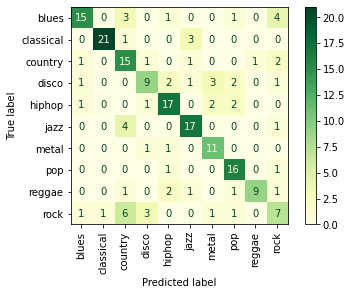

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = le_3s.inverse_transform(y_pred)

y_test_label = le_3s.inverse_transform(y_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test_label, y_pred, display_labels=le_3s.classes_,
                                               xticks_rotation="vertical", cmap="YlGn")

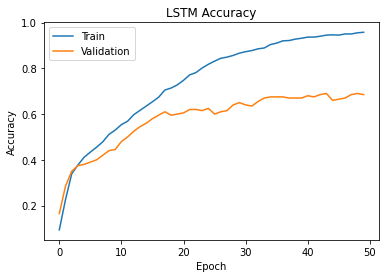

In [30]:
import matplotlib.pyplot as plt

plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

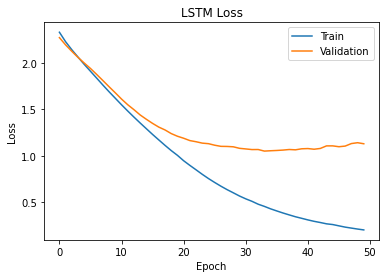

In [31]:
plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()